In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


## Monte Carlo Simulation

In [2]:


def func(N_in, N_out, N_boat_busy, N_boat_free, p, q, steps = 100):

    N_in_List = []
    N_out_List = []
    N_boat_busy_List = []
    N_boat_free_List = []


    alpha = 0.25

    for i in range(steps):

        boarding = alpha*N_in*p
        if boarding > N_boat_free:
            boarding = N_boat_free
        N_in -= boarding
        N_boat_free -= boarding
        N_boat_busy += boarding

        unboarding = q*alpha*N_boat_busy
        N_out += unboarding
        N_boat_busy -= unboarding
        N_boat_free += unboarding

        N_in_List.append(N_in)
        N_out_List.append(N_out)
        
    return N_in_List, N_out_List

In [3]:
N_in = 500
N_out = 0
N_boat_busy = 0
N_boat_free = 10


p = 0.5
q = 0.5


In [4]:
N_in_List, N_out_List = func(N_in, N_out, N_boat_busy, N_boat_free, p, q)

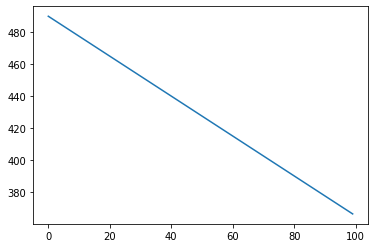

In [5]:
plt.plot(N_in_List)

In [6]:
@interact(N_boat_free = (0,200,10), N_in = (0,500,10))
def intera(N_boat_free, N_in):
    N_out = 0
    N_boat_busy = 0


    p = 0.5
    q = 0.5
    N_in_List, N_out_List = func(N_in, N_out, N_boat_busy, N_boat_free, p, q)
    
    fig, ax = plt.subplots(3,1, figsize=(17,12))
    
    
    ax[0].grid()
    ax[0].plot(N_in_List)
    ax[0].set_title("Population Vs. Time")

    ax[1].plot(np.log(N_in_List))
    ax[1].grid()
    ax[1].set_title("log(Population) Vs. Time")
    
    
    slope = (np.log(N_in_List) - np.roll(np.log(N_in_List),-1))[:-1]
    ax[2].plot(slope)
    ax[2].grid()
    ax[2].set_title("slope Log(Population) Vs. Time")
    


interactive(children=(IntSlider(value=100, description='N_boat_free', max=200, step=10), IntSlider(value=250, …

In [7]:
N_in_List = np.arange(0,320,10)
N_boat_free = 80

N_out = 0
N_boat_busy = 0


p = 0.5
q = 0.5

N_in_final_List =  []

for N_in in N_in_List:
    N_in_List, N_out_List = func(N_in, N_out, N_boat_busy, N_boat_free, p, q, steps = 20)
    N_in_final_List.append(N_in_List[-1])
    

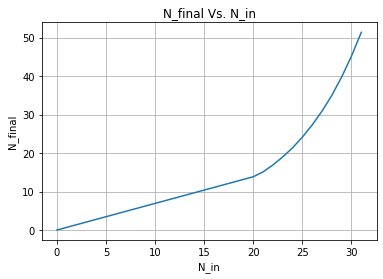

In [8]:
plt.plot(N_in_final_List)
plt.title("N_final Vs. N_in")
plt.xlabel("N_in")
plt.ylabel("N_final")
plt.grid()

## Continues Modeling

In [9]:
def S(x):
    if x> 0:
        return 1
    else:
        return 0

In [10]:
N_in = 1000
N_boat = 50
N_tot = N_boat
N_out = 0


N_in_List = []
N_boat_List = []
N_tot_List = []
N_out_List = []

tmax = 60
l = 9
dt = tmax/np.power(2,l)
tList = np.arange(0, tmax, dt)

for i in tList:
    
    dN_in = -N_in*p*S(N_boat)
    N_in += dN_in * dt
    N_boat += dN_in * dt + q*(N_tot - N_boat) * dt
    N_out += -q*(N_tot - N_boat) * dt
    
    N_in_List.append(N_in)
    N_boat_List.append(N_boat)

Text(0.5, 1.0, 'slope Log(Population) Vs. Time')

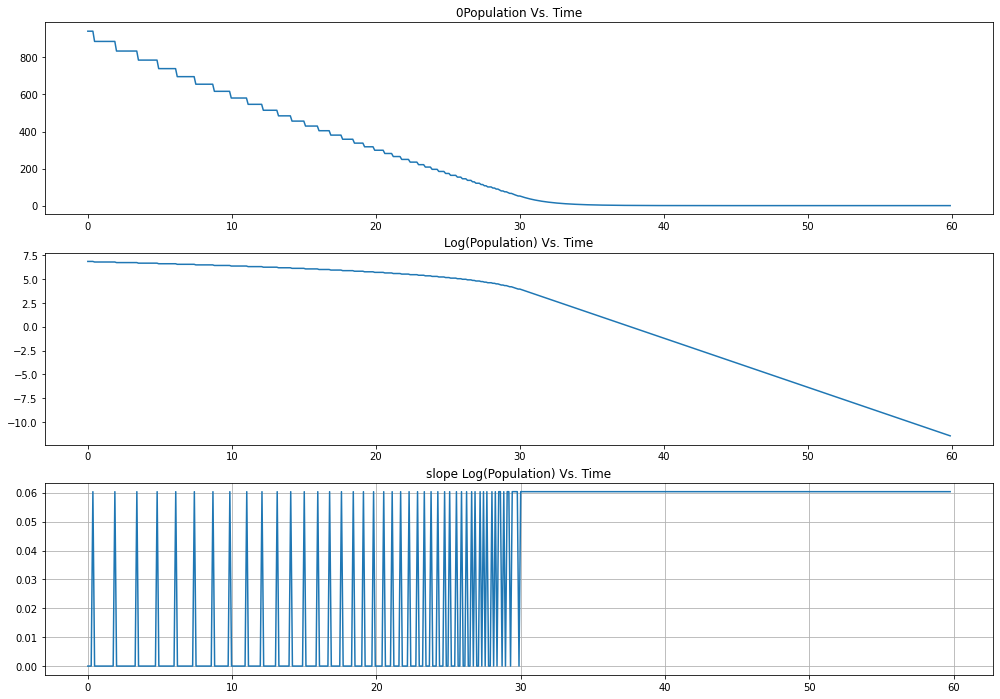

In [11]:
fig, ax = plt.subplots(3,1, figsize=(17,12))
ax[0].plot(tList, N_in_List)
ax[0].set_title("0Population Vs. Time")
ax[1].plot(tList, np.log(N_in_List))
ax[1].set_title("Log(Population) Vs. Time")
slope = (np.log(N_in_List) - np.roll(np.log(N_in_List),-1))[:-1]
ax[2].plot(tList[:-1],slope)
ax[2].grid()
ax[2].set_title("slope Log(Population) Vs. Time")

Text(0.5, 1.0, 'N_boat')

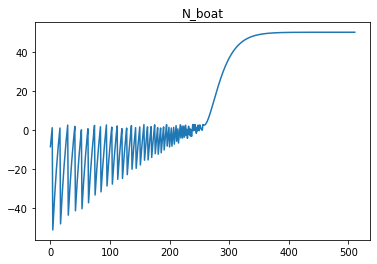

In [12]:
plt.plot(N_boat_List)
plt.title("N_boat")

In [13]:
N_in = 1000
N_boat = 100
N_tot = N_boat
N_out = 0


N_in_List = []
N_boat_List = []
N_tot_List = []
N_out_List = []

tmax = 60
l = 11
dt = tmax/np.power(2,l)
tList = np.arange(0, tmax, dt)

for i in tList:
    
    dN_in = -N_in*p*dt
    dN_in = S(-(N_boat - dN_in))*(-N_boat)+ S((N_boat - dN_in))*dN_in
    N_in += dN_in 
    N_boat += dN_in  + q*(N_tot - N_boat) * dt
    N_out += -q*(N_tot - N_boat) * dt
    
    N_in_List.append(N_in)
    N_boat_List.append(N_boat)


Text(0.5, 1.0, 'slope Log(Population) Vs. Time')

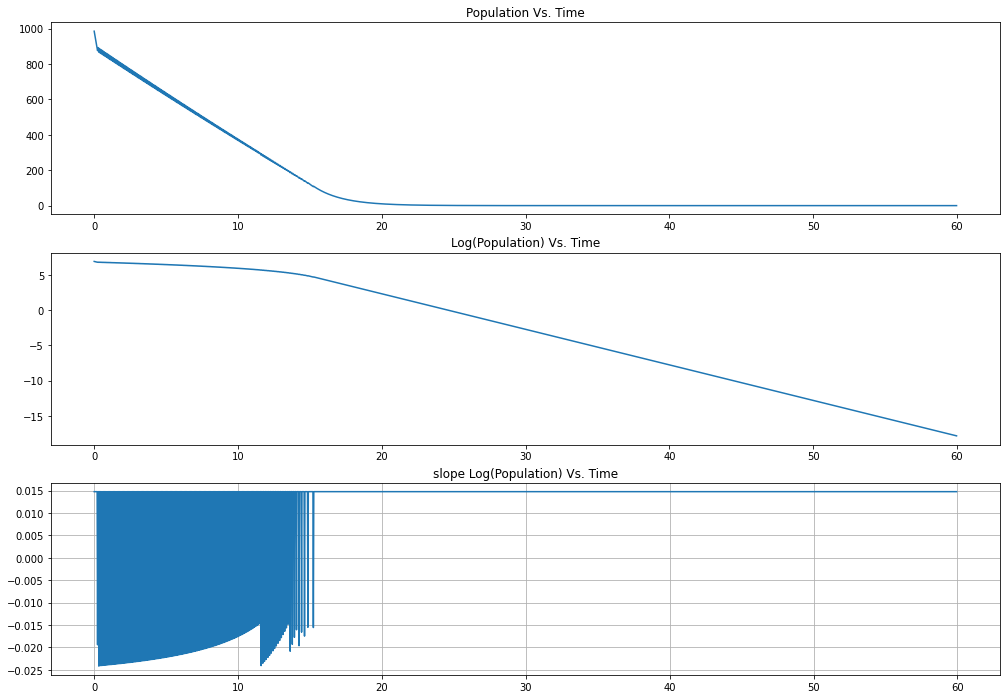

In [14]:
fig, ax = plt.subplots(3,1, figsize=(17,12))
ax[0].plot(tList, N_in_List)
ax[0].set_title("Population Vs. Time")
ax[1].plot(tList, np.log(N_in_List))
ax[1].set_title("Log(Population) Vs. Time")
slope = (np.log(N_in_List) - np.roll(np.log(N_in_List),-1))[:-1]
ax[2].plot(tList[:-1],slope)
ax[2].grid()
ax[2].set_title("slope Log(Population) Vs. Time")

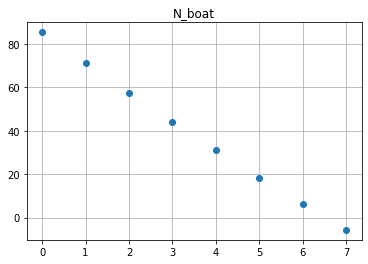

In [15]:
plt.plot(N_boat_List[:8],'o')
plt.title("N_boat")
plt.grid()

## SA like approach to model the saturation

In [245]:



def SArun(N_in_c, N_out_s, N_free_enz , p,q):

    l = 12
    tmax =  20
    dt = tmax/(np.power(2,l))
    tList = np.arange(0,tmax,dt)


    N_in_c_List = np.zeros(tList.shape[0])
    N_out_s_List = np.zeros(tList.shape[0])
    N_free_enz_List = np.zeros(tList.shape[0])


    for t in range(tList.shape[0]):

        N_in_c_List[t] = (N_in_c)
        N_out_s_List[t] = (N_out_s)
        N_free_enz_List[t] = (N_free_enz)


        D1 = -p*N_free_enz*N_in_c
        D2 = (N_tot - N_free_enz)*q

        N_free_enz += (D1+D2)*dt
        N_in_c += D1*dt
        N_out_s += D2*dt
        
    return N_in_c_List, N_free_enz_List

    

In [248]:
@interact(N_in_c=(0,100,10), N_free_enz=(0,100,10))
def intera(N_in_c, N_free_enz):
    N_out_s  = 0

    p = 0.5
    q = 0.5
    N_out_s = 0
    N_in_c_List, N_free_enz_List = SArun(N_in_c, N_out_s, N_free_enz , p,q)
    
    fig, ax = plt.subplots(4,1, figsize=(17,12))
    
    
    ax[0].grid()
    ax[0].plot(N_in_c_List)
    ax[0].set_title("Population Vs. Time")

    ax[1].plot(np.log(N_in_c_List))
    ax[1].grid()
    ax[1].set_title("log(Population) Vs. Time")
    
    
    slope = (np.log(N_in_c_List) - np.roll(np.log(N_in_c_List),-1))[:-1]
    ax[2].plot(slope)
    ax[2].grid()
    ax[2].set_title("slope Log(Population) Vs. Time")
    
    ax[3].plot(N_free_enz_List)
    ax[3].grid()
    ax[3].set_title("enz population Vs. Time")
    


interactive(children=(IntSlider(value=50, description='N_in_c', step=10), IntSlider(value=50, description='N_f…

In [24]:
N_free_enz = 300
N_input_c_List = np.arange(100,1000,10)
N_out_s = 0

N_finalList = np.zeros(N_input_c_List.shape[0])

for i, N_in_c in enumerate(N_input_c_List):
    N_in_c_List = SArun(N_in_c, N_out_s, N_free_enz , p,q)
    N_finalList[i]=(N_in_c_List[50])


In [25]:
N_input_c_List.shape

(90,)

(0.0, 150.0)

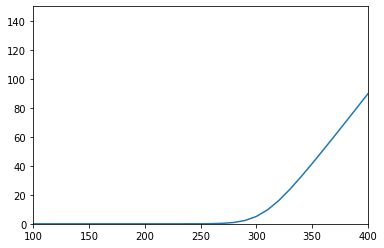

In [26]:
plt.plot(N_input_c_List,N_finalList)
plt.xlim(100,400)
plt.ylim(0,150)

### Monte Carlo Version of the SA Model

In [211]:
steps = 5000

N_enz_free = 150
N_in_c = 300
N_out_s = 0
N_enz_total = N_enz_free


N_enz_free_List = np.zeros(steps)
N_in_c_List = np.zeros(steps)
N_out_s_List = np.zeros(steps)


p = 0.5
q = 0.5
alpha = 0.001

for i in range(steps):
    N_in_c_List[i] = N_in_c
    N_enz_free_List[i] = N_enz_free
    
    dN_enz_free = -N_enz_free*N_in_c*alpha*p
    dN_out_s = (N_enz_total - N_enz_free)*q * alpha
    #print(dN_enz_free)
    
    N_enz_free += (dN_enz_free + dN_out_s)
    N_in_c += dN_enz_free
    N_out_s += dN_out_s
    
    



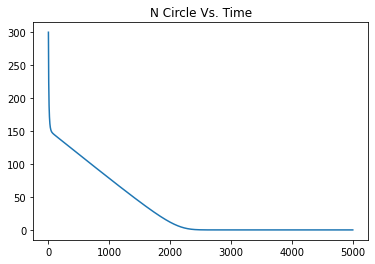

In [222]:
plt.plot(N_in_c_List)
_ = plt.title("N Circle Vs. Time")

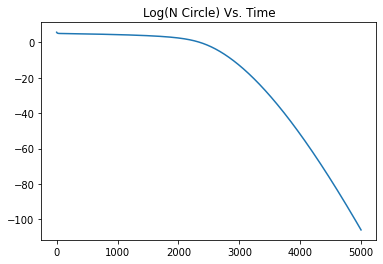

In [223]:
plt.plot(np.log(N_in_c_List))
_ = plt.title("Log(N Circle) Vs. Time")

In [217]:
slope = (np.log(N_in_c_List) - np.roll(np.log(N_in_c_List),-1))[:-1]

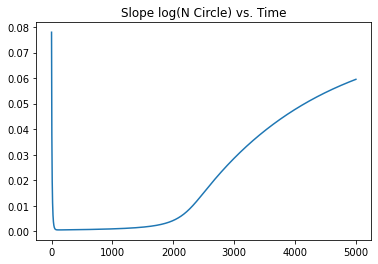

In [225]:
plt.plot(slope)
_ = plt.title("Slope log(N Circle) vs. Time")

Text(0.5, 1.0, 'Population Free Enzymes Vs. Time')

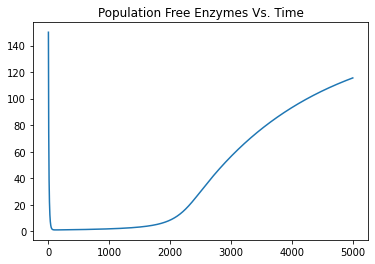

In [226]:
plt.plot(N_enz_free_List)
plt.title("Population Free Enzymes Vs. Time")

## An Important Finding

As you can see in the simulation above, it seems that the slope of the log(N circle) (which is in fact the exponent) has the same shape as of the number of free enzymes

In [ ]:
b

In [ ]:
b

In [227]:
## Tests

In [240]:
def func(x):
    return np.exp(-x)+4

In [241]:
x = np.arange(0,10,0.01)
y = func(x)

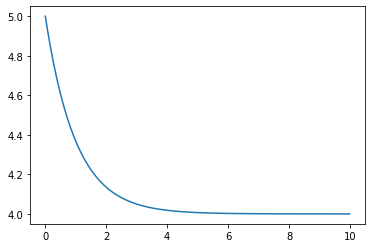

In [242]:
plt.plot(x,y)

/tmp/ipykernel_4400/2531830635.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(y-y[-1]))


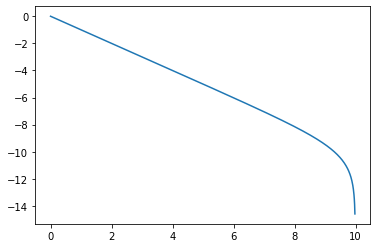

In [244]:
plt.plot(x,np.log(y-y[-1]))

In [233]:
dy = (y - np.roll(y,-1))[:-1]

In [234]:
b = y[:-1] - dy

In [238]:
y = y - b[-1]

/tmp/ipykernel_4400/1834447014.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(y))


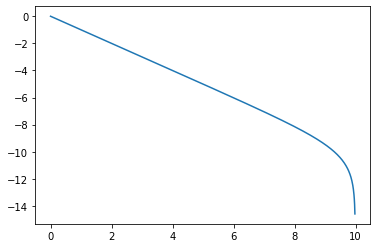

In [239]:
plt.plot(x,np.log(y))